<a href="https://colab.research.google.com/github/hilmimughid/PCVK_Ganjil_2023/blob/main/Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama: Hilmi Mughid**

# **Kelas: TI-3C**

# **No. Absen: 09**

# **NIM: 2141720081**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)


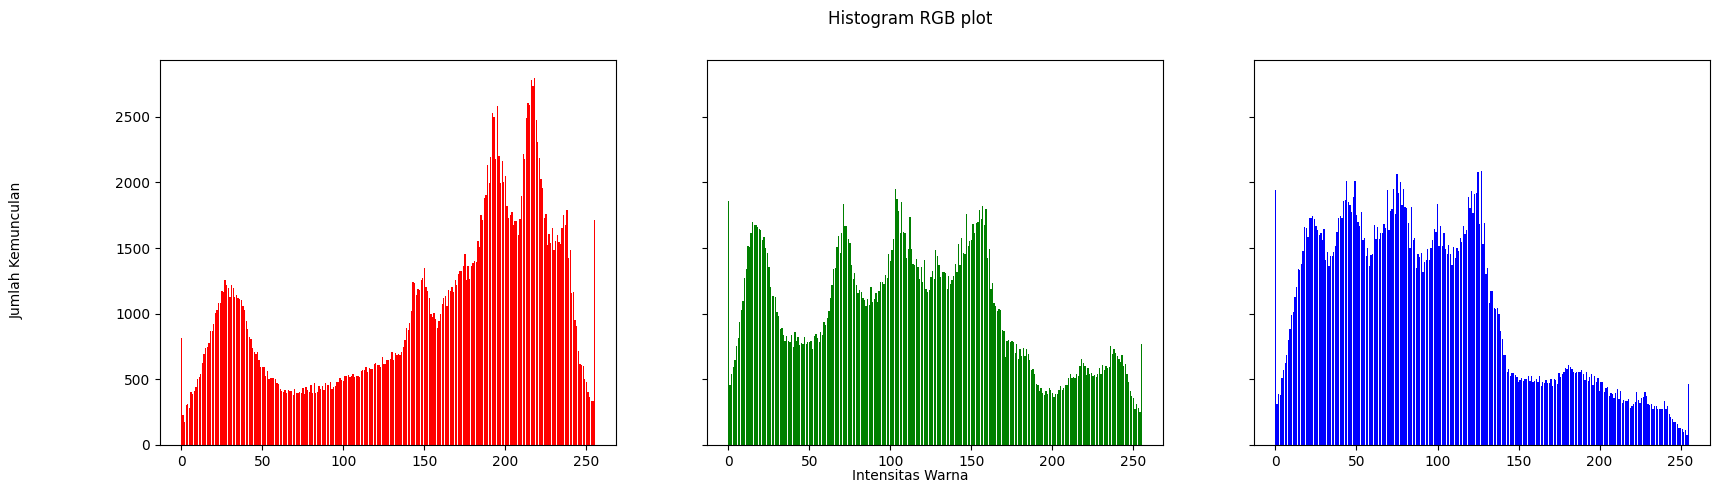

In [ ]:
# Membaca gambar 'lena.jpg' dari direktori yang ditentukan
img_1 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Mengubah gambar dari ruang warna BGR ke RGB
img_rgb = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)

# Mendapatkan tinggi dan lebar dari gambar
height, width, _ = img_1.shape

# Membuat list untuk menyimpan nilai histogram untuk setiap channel warna
blue = [0] * 256
green = [0] * 256
red = [0] * 256

# Melakukan iterasi pada setiap piksel di gambar dan menghitung histogram
for y in range(height):
    for x in range(width):
        blue[img_1[y, x, 0]] += 1
        green[img_1[y, x, 1]] += 1
        red[img_1[y, x, 2]] += 1

# Membuat array untuk intensitas warna
names = np.arange(256)

# Membuat plot histogram untuk setiap channel warna
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Menampilkan histogram untuk setiap channel warna
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

# Menampilkan plot
plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya.


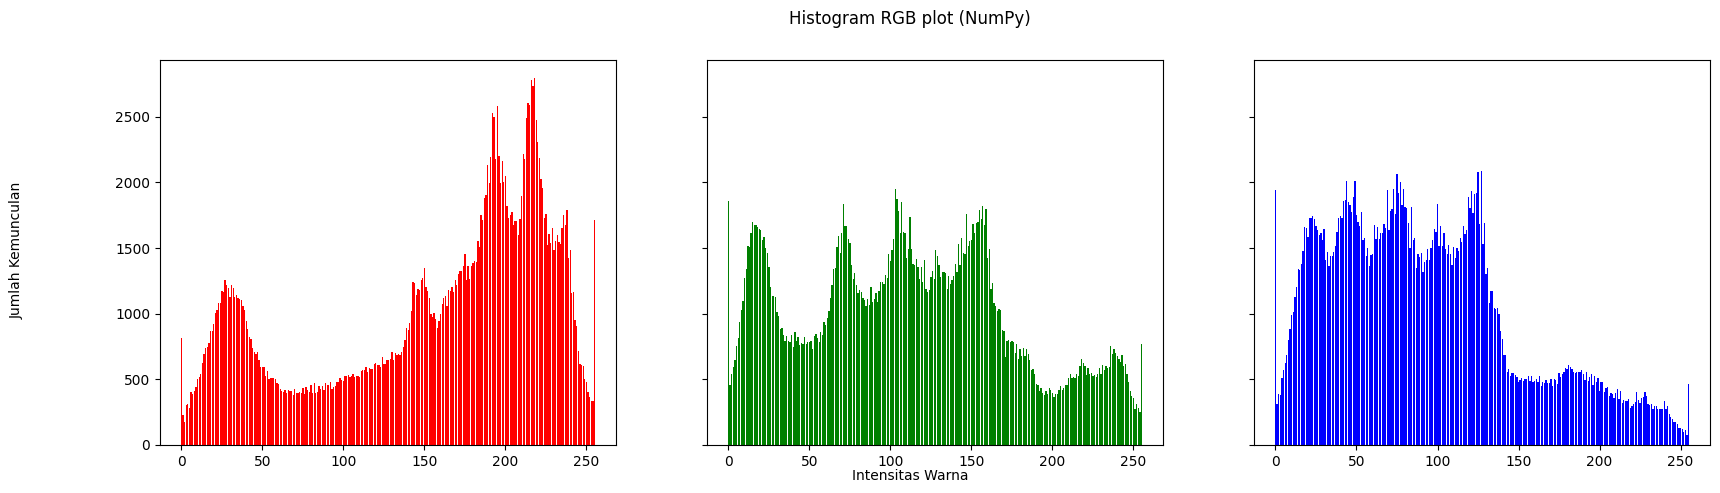

In [ ]:
# Membaca gambar 'lena.jpg' dari direktori yang ditentukan
img_1 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Mengubah gambar dari ruang warna BGR ke RGB
img_rgb = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)

# Menghitung histogram untuk setiap channel warna menggunakan NumPy
hist_blue, _ = np.histogram(img_1[:, :, 0], bins=256, range=(0, 256))
hist_green, _ = np.histogram(img_1[:, :, 1], bins=256, range=(0, 256))
hist_red, _ = np.histogram(img_1[:, :, 2], bins=256, range=(0, 256))

# Membuat array untuk intensitas warna
names = np.arange(256)

# Membuat plot histogram untuk setiap channel warna
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot (NumPy)')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Menampilkan histogram untuk setiap channel warna
axs[0].bar(names, hist_red, color='red')
axs[1].bar(names, hist_green, color='green')
axs[2].bar(names, hist_blue, color='blue')

# Menampilkan plot
plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)


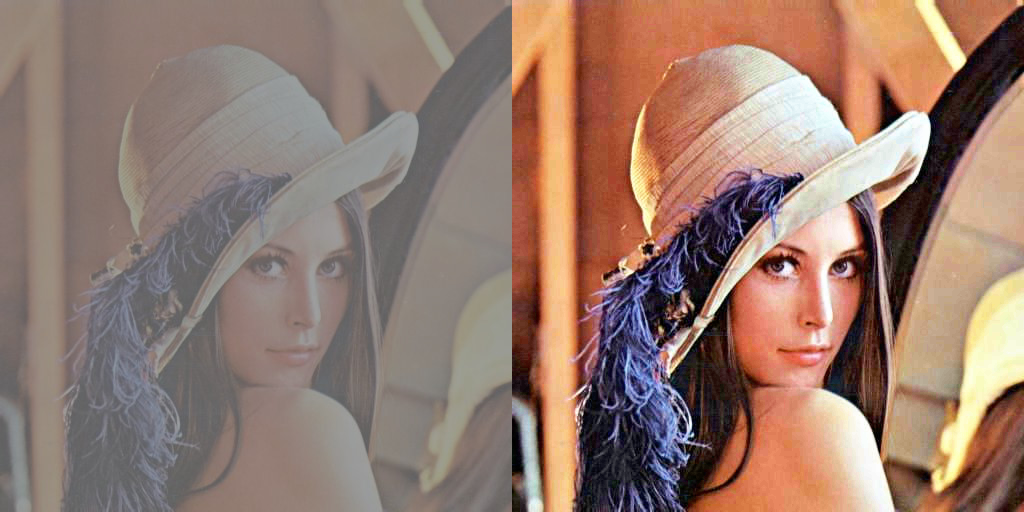

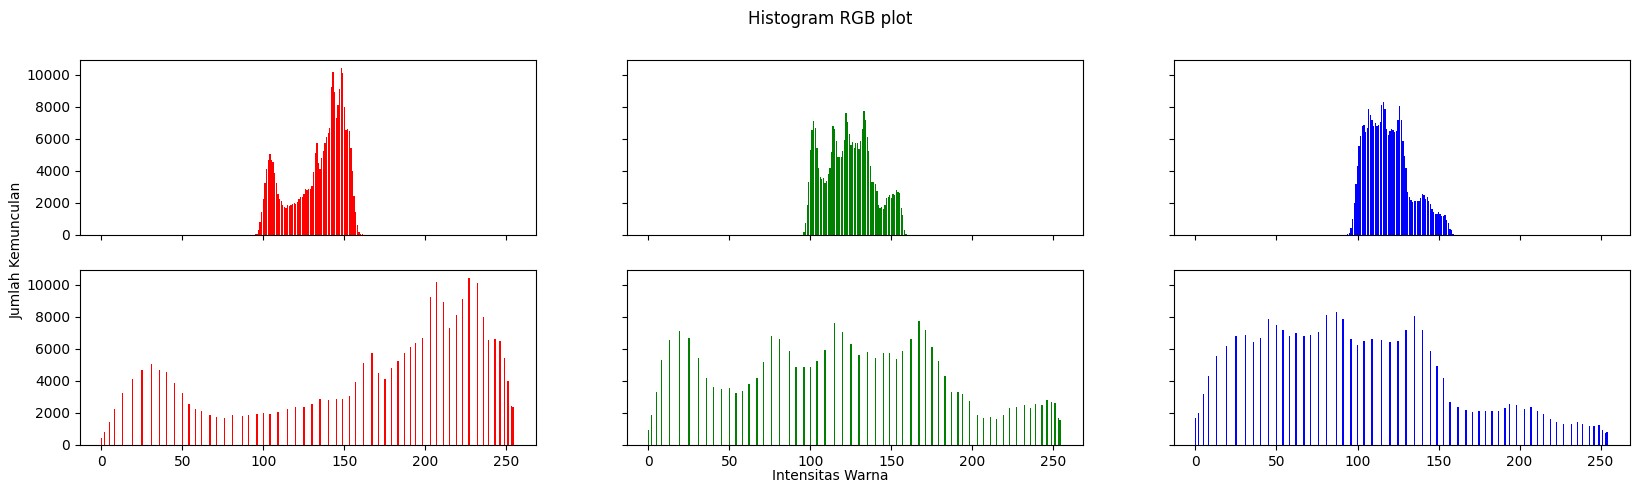

In [ ]:
# Membaca gambar 'lena_lc.jpg' dari direktori yang ditentukan
img1 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Mendefinisikan fungsi untuk menghitung histogram gambar
def histog(img1):
  # Mendapatkan tinggi, lebar, dan kedalaman gambar
  height, width, depth = np.shape(img1)
  # Membuat array kosong untuk menyimpan nilai histogram
  ax = np.zeros((3,256))
  # Melakukan iterasi pada setiap piksel di gambar dan menghitung histogram
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

# Menghitung histogram gambar asli
histo_asli = histog(img1)

# Mengubah gambar menjadi array
img_array = np.asarray(img1)

# Menghitung histogram dengan menggunakan fungsi bincount dari NumPy
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Menghitung jumlah total piksel di gambar
num_pixels = np. sum(histogram_array)
# Normalisasi histogram
histogram_array = histogram_array/num_pixels

# Menghitung cumulative distribution function (CDF)
chistogram_array = np.cumsum(histogram_array)

# Membuat peta transformasi untuk equalisasi histogram
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

# Menerapkan peta transformasi ke gambar asli
img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

# Menghitung histogram gambar hasil equalisasi
equal_histo = histog(img2)

# Menampilkan gambar asli dan hasil equalisasi secara berdampingan
final_frame = cv.hconcat((img1, img2))
cv2_imshow(final_frame)

# Membuat plot histogram untuk setiap channel warna
names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
    fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0,0].bar(names, histo_asli[2], color='red')
    axs[0,1].bar(names, histo_asli[1], color='green')
    axs[0,2].bar(names, histo_asli[0], color='blue')
    axs[1,0].bar(names, equal_histo[2], color='red')
    axs[1,1].bar(names, equal_histo[1], color='green')
    axs[1,2].bar(names, equal_histo[0], color='blue')
else:
    fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
    fig. suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0,0].bar(names, histo_asli[2], color='gray')
    axs[0,1].bar(names, equal_histo[2], color='gray')

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya.

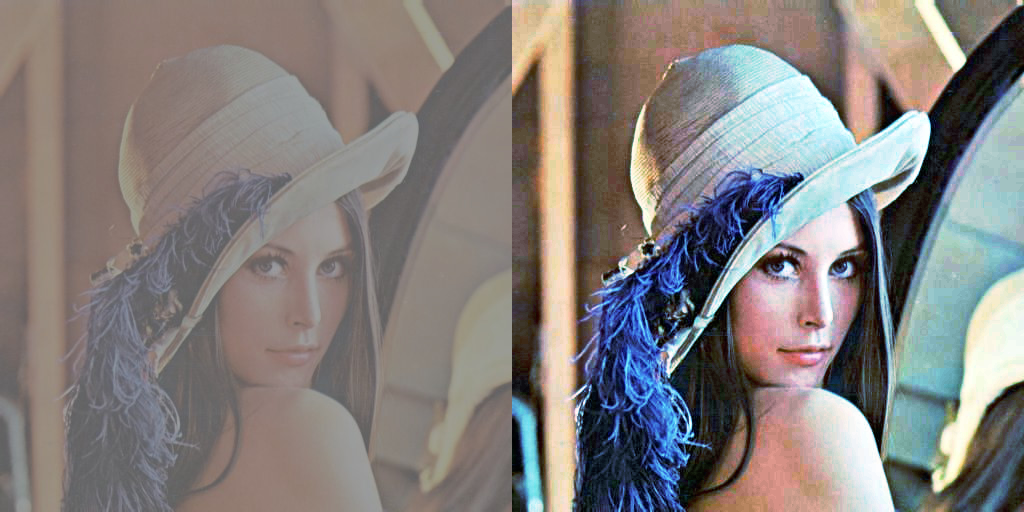

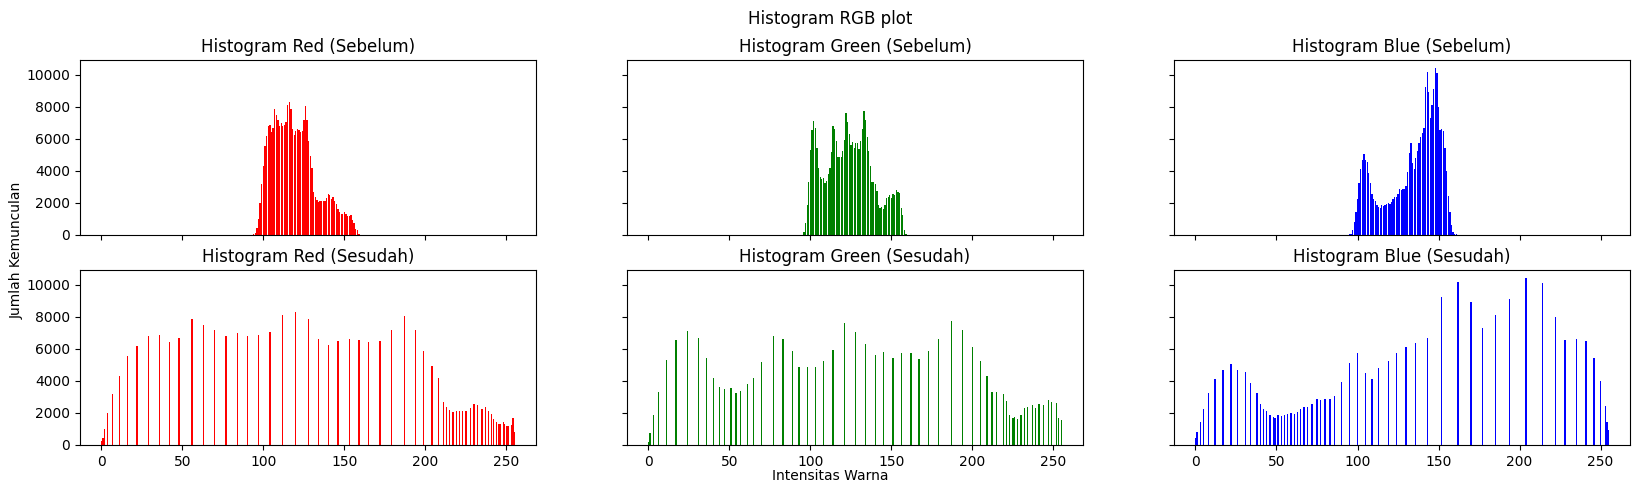

In [ ]:
# Membaca gambar 'lena_lc.jpg' dari direktori yang ditentukan
img1 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Mendefinisikan fungsi untuk menghitung histogram gambar
def histog(img):
  # Mendapatkan tinggi, lebar, dan kedalaman gambar
  height, width, depth = np.shape(img)
  # Membuat array kosong untuk menyimpan nilai histogram
  ax = np.zeros((3, 256))
  # Melakukan iterasi pada setiap piksel di gambar dan menghitung histogram
  for y in range(0, height):
    for x in range(0, width):
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1
  return ax

# Menghitung histogram gambar asli
histo_asli = histog(img1)

# Melakukan equalisasi histogram pada setiap channel warna menggunakan fungsi equalizeHist dari OpenCV
equalized_channels = [cv.equalizeHist(img1[:, :, i]) for i in range(3)]

# Menggabungkan kembali channel-channel warna yang telah diequalisasi
img2 = cv.merge(equalized_channels)

# Menghitung histogram gambar hasil equalisasi
equal_histo = histog(img2)

# Menampilkan gambar asli dan hasil equalisasi secara berdampingan
final_frame = cv.hconcat((img1, img2))
cv2_imshow(final_frame)

# Membuat array untuk intensitas warna
names = np.arange(256)

# Membuat plot histogram untuk setiap channel warna
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Menampilkan histogram untuk setiap channel warna sebelum dan sesudah equalisasi
for i, color in enumerate(['red', 'green', 'blue']):
    axs[0, i].bar(names, histo_asli[i], color=color)
    axs[0, i].set_title(f'Histogram {color.capitalize()} (Sebelum)')

    axs[1, i].bar(names, equal_histo[i], color=color)
    axs[1, i].set_title(f'Histogram {color.capitalize()} (Sesudah)')

plt.show()

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)


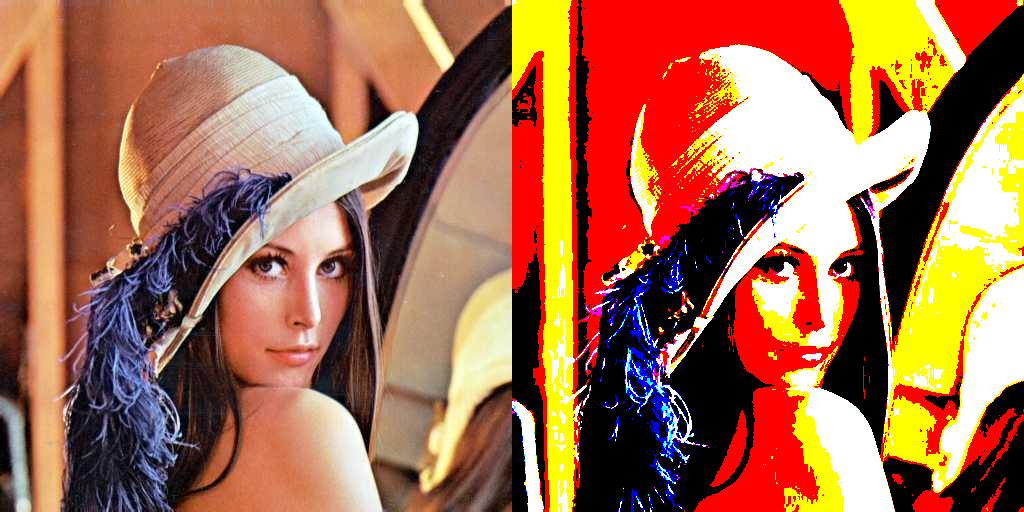

In [ ]:
# Mendefinisikan fungsi untuk mencari warna terdekat dalam palet warna
def warnaTerdekat (r, g, b):
  # Inisialisasi nilai awal
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  # Mendefinisikan palet warna
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]

  # Melakukan iterasi pada setiap warna dalam palet dan menghitung jaraknya dengan warna input
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff

    # Jika jarak lebih kecil dari jarak minimum sebelumnya, perbarui jarak minimum dan nilai pValue
    if (distance < minDistance):
      minDistance = distance
      pValue = i

  return pValue

# Membaca gambar 'lena.jpg' dari direktori yang ditentukan
img1 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Mendefinisikan palet warna
warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]

# Mengubah gambar dari ruang warna BGR ke RGB
img_16 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)

# Membuat gambar kosong dengan ukuran yang sama dengan gambar asli
img_8 = np.zeros(img_16.shape, img_16.dtype)

# Melakukan iterasi pada setiap piksel di gambar dan mengubah warnanya menjadi warna terdekat dalam palet
for y in range(0, img_16.shape[0]):
    for x in range(0, img_16.shape[1]):
        baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
        img_8[y, x] = warnaPallette[baru]

# Mengubah kembali gambar dari ruang warna RGB ke BGR
img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)

# Menampilkan gambar asli dan hasil reduksi warna secara berdampingan
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)


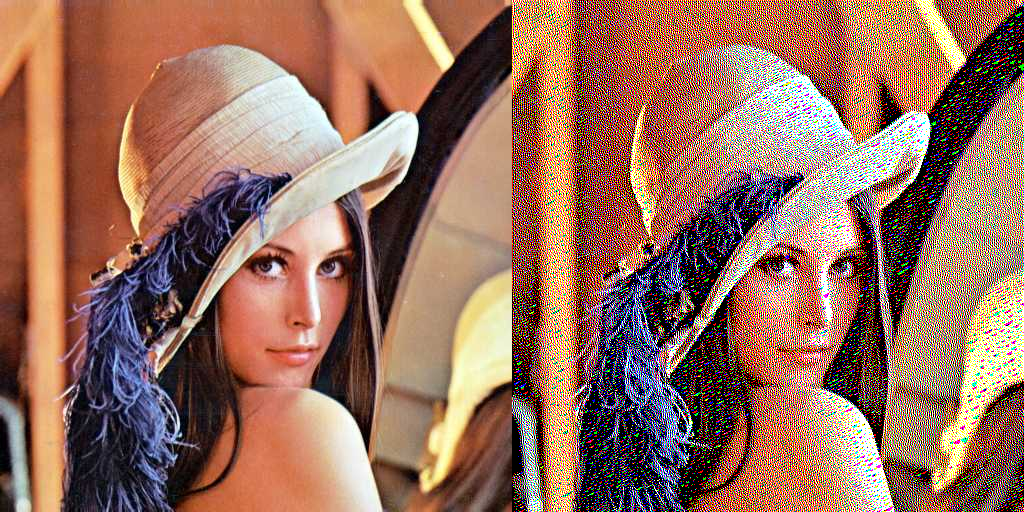

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK_2023/Images/FotoLena.jpg')

# Konversi ke tipe float
img_float = np.float64(img)

# Ukuran gambar
height, width, channels = img.shape

# Proses dithering Floyd and Steinberg pada setiap saluran warna
for y in range(height):
    for x in range(width):
        for c in range(channels):  # Loop untuk setiap saluran warna (R, G, B)
            old_value = img_float[y, x, c]
            new_value = round(old_value / 255) * 255
            img_float[y, x, c] = new_value

            error = old_value - new_value

            if x < width - 1:
                img_float[y, x + 1, c] += error * 7 / 16
            if y < height - 1:
                if x > 0:
                    img_float[y + 1, x - 1, c] += error * 3 / 16
                img_float[y + 1, x, c] += error * 5 / 16
                if x < width - 1:
                    img_float[y + 1, x + 1, c] += error * 1 / 16

# Konversi kembali ke tipe uint8
output_img = np.uint8(img_float)

# Menampilkan gambar awal dan hasil dithering
cv2_imshow(img)
cv2_imshow(output_img)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!


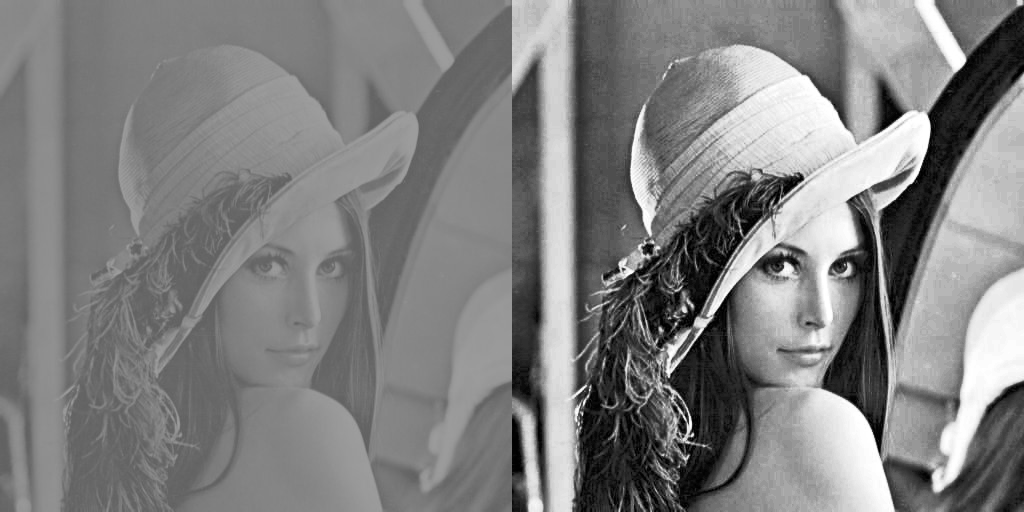

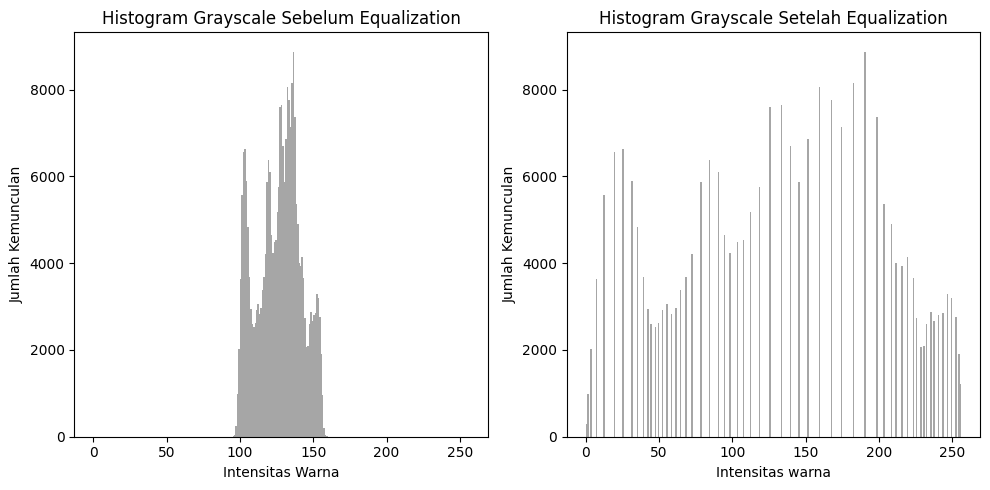

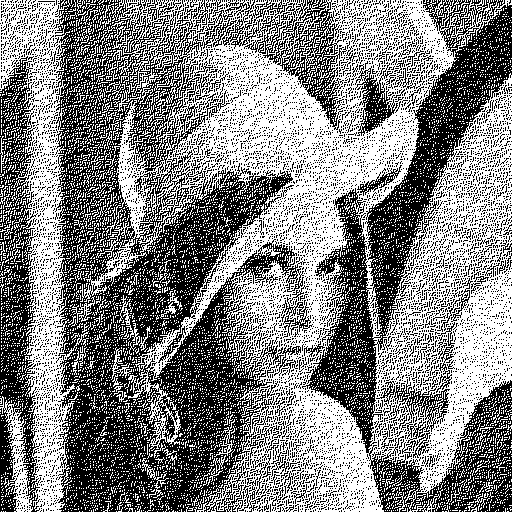

In [ ]:
# Membaca gambar 'lena_lc.jpg' dari direktori yang ditentukan dalam mode grayscale
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

# Membuat plot histogram gambar asli
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Sebelum Equalization')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

# Melakukan equalisasi histogram pada gambar asli
equalized_img = cv.equalizeHist(img)

# Membuat plot histogram gambar hasil equalisasi
plt.subplot(122)
plt.hist(equalized_img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Setelah Equalization')
plt.xlabel('Intensitas warna')
plt.ylabel('Jumlah Kemunculan')

# Menyesuaikan layout plot
plt.tight_layout()

# Mengubah gambar hasil equalisasi menjadi tipe data float32
img_float = np.float32(equalized_img)
height, width = img.shape

# Melakukan dithering menggunakan algoritma Floyd-Steinberg
for y in range(height):
    for x in range(width):
        old_value = img_float[y, x]
        new_value = round(old_value / 255) * 255
        img_float[y, x] = new_value

        error = old_value - new_value

        if x < width - 1:
            img_float[y, x + 1] += error * 10 / 16
        if y < height - 1:
            if x > 0:
                img_float[y + 1, x - 1] += error * 7 / 16
            img_float[y + 1, x] += error * 4 / 16
            if x < width - 1:
                img_float[y + 1, x + 1] += error * 15 / 16

# Mengubah kembali gambar menjadi tipe data uint8
output_img = np.uint8(img_float)

# Menampilkan gambar asli dan hasil equalisasi secara berdampingan
final_frame = cv.hconcat((img, equalized_img))
cv2_imshow(final_frame)

# Menampilkan plot histogram
plt.show()

# Menampilkan gambar hasil dithering
cv2_imshow(output_img)